# TMA4320 - Øving 5, Iterative metoder

Dette er en liten øving som du burde kunne gjøre før du starter opp med Prosjekt 2.
Den bli veiledet i øvingstimen fredag 22.2, kl 9-10. Innleveringsfrist er fredag 1. mars.


**Oppgave 1** Vi skal løse et spesifikt ligningssystem
$$
     A \mathbf{u} = b,\quad A\in\mathbb{R}^{n\times n},\quad b\in\mathbb{R}^n
$$

med hensyn på $\mathbf{u}$ ved å bruke SOR-metoden. La $h=\frac{1}{n+1}$ og la $b_i=h^2f(x_i)$
der $f(x)$ er en funksjon definert på intervallet $x\in[0,1]$. Vi tenker oss at systemet stammer fra Poisson-problemet $-u''(x)=f(x)$ der den dobbelderiverte er erstattet med en differenseformel, og en bruker randverdier $u(0)=u(1)=0$.
Vi har da at

$$
A = \left[
\begin{array}{rrrrrrr}
2 & -1 & 0 &  \cdots & 0  \\
-1&  2 & -1    &   \ddots      & \vdots \\
0 & \ddots & \ddots & \ddots & 0 \\
\vdots &\ddots & \ddots &\ddots & -1 \\
0 &\cdots & 0 & -1 & 2
\end{array} 
\right]
$$

Du kan bruke følgende verdier til å teste ut:

* $n=10$
* $f(x)=x$ som impliserer at den eksakte løsningen er $u(x) = \frac{1}{6}\,x\,(1-x^2)$ eller
$\mathbf{u}_i\,=\,ih\,(1-(ih)^2),\ i=1,\ldots,n$
* $\mathtt{tol}=$1e-5
* $\omega=1.2$
* $\mathtt{maxiter}=1000$
* $u_0=[0,\ldots,0]^T$ (numpy.zeros(n))

Bruk algoritmen beskrevet i boka på side 110 og bruk gjerne en funksjonsheader som nedenfor.
Bruk det enkle feilestimatet $\mathtt{est}=\|u^{(k+1)}-u^{(k)}\|$ (numpy.linalg.norm()).

**NB!** Du kan skrive funksjonen som *dedikert* til matrisen $A$, dvs funksjonen hardkoder at $A$ er gitt som ovenfor og behøver ikke å kunne brukes for en vilkårlig $A$.

**Kontrollspørsmål 1** Hvor mange iterasjoner trengs for å oppnå det spesifiserte stoppkriteriet ovenfor.
Denne gangen angir du ditt resultat (ikke flervalg).

**Oppgave 2** For tilfellet $n=30$, $f(x)=-\sin x\ln x$, $\mathtt{tol}=$1e-5, $u_0=[0,\ldots,0]^T$, prøv deg fram for å finne hvilken $\omega$ som gjør at iterasjonen konvergerer raskest.

**Kontrollspørsmål 2:** Angi din optimale $\omega$ med 2 gjeldende siffer (dvs f.eks. 1.3). Du kan nøye deg med å søke etter $\omega$-verdier i intervallet $[1,2]$. Her angir du også verdi (ikke flervalg).


**Godkjenningskrav**
En Jupyter notebook fil med funksjon som implementerer SOR-metoden som spesifisert skal lastes opp i Bb og det skal svares på kontrollspørsmål.



In [4]:
import numpy as np
import matplotlib.pyplot as plt



    
def Poisson(omega,f,u0,tol,maxiter):
    #lager A = D + L + U og b
    h = 1/(n+1)
    L  = np.zeros((n,n))
    U = np.zeros((n,n))
    D  = np.zeros((n,n))
    np.fill_diagonal(D, np.array(np.full((n,1), 2)))
    b = np.linspace(0, 1, n + 2)
    b = np.delete(b,n+1)
    b = np.delete(b, 0)
    b = f(b) * h**2
    b = np.transpose(b)
    for i in range(n):
        if i> 0:
            L[i,i-1] = -1
        if i < n-1:
            U[i,i+1] = -1
    #for løkka
    iter = 0
    est = 1
    temp = u0
    while iter < maxiter and est > tol:
        uk = temp
        ukp1 = np.linalg.inv(omega * L + D) @ ((1 - omega) * D @uk  - omega * U @ uk) + omega * np.linalg.inv(D + omega * L) @ b
        temp = ukp1
        iter += 1
        est = np.linalg.norm(ukp1  - uk)
        '''
        Compute the solution to Poisson's equation in 1D by means of the SOR method. 
        Return the computed solution u.
        omega: Value of the relaxation parameter in SOR
        f: The right hand side of the Poisson equation as in -u''(x) = f(x)
        u0: The initial value for the iteration
        tol: The tolerance to be used in the stopping criterion (est < tol)
        maxiter: The maximum number of iterations

        '''
   
    
    return ukp1, iter




In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return x

n = 10
tol = 1e-5
omega = 1.2
maxiter = 1000
u0 = np.transpose(np.zeros(n))

u1, iter1 = Poisson(omega,f1,u0,tol,maxiter)

print("Kontrollspørsmål 1\n")
print("\nAntall iterasjoner:", iter1, "\nu = ", u1, "\n")


Kontrollspørsmål 1


Antall iterasjoner: 61 
u =  [0.01501485 0.02928066 0.0420466  0.05256151 0.06007402 0.06383252
 0.06308523 0.05708027 0.0450657  0.02628957] 

[0.09015778 0.17580766 0.25244177 0.31555222 0.3606311  0.38317055
 0.37866266 0.34259955 0.27047333 0.15777611]


minOmega: 1.8300000000000007
min iter: 43


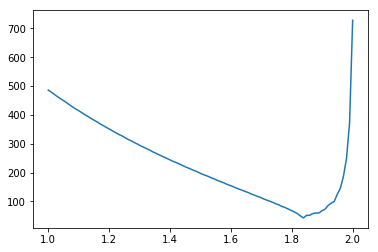

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f2(x):
    return - np.sin(x) * np.log(x)

n = 30
tol = 1e-5
maxiter = 1000
u0 = np.transpose(np.zeros(n))

iterationMin = 1000
minOmega = 0
iterList = np.zeros(100)
i = 0
for omega in np.arange(1, 2, 0.01):
    u, iter = Poisson(omega,f2,u0,tol,maxiter)
    iterList[i] = iter
    i += 1
    if iter < iterationMin:
        iterationMin = iter
        minOmega = omega
# print("\n number of iterations: ", iter)
# print("u:", u)
print("minOmega:", minOmega)
print("min iter:", iterationMin)
## A plot that shows the lowest values for iterations
plt.plot(np.linspace(1, 2, 100), iterList)

plt.show()

In [3]:
from sympy import latex, Indexed
from sympy.abc import omega

N = 2
# boksbredde (m)
L = 4.0e-9
# omega, b, N_omega som heltall, altså omega = i betyr i posisjonsverdier, samme for b
Omega = 3
b = 5
N_omega = 5

print("For få delintervall, N = ", N, "med ", latex(omega, mode = 'equation'), "=", Omega, " , b = ", b, " og ",latex(Indexed('N',omega)), " = ", N_omega," endre på dette, og prøv igjen.")

For få delintervall, N =  2 med  \begin{equation}\omega\end{equation} = 3  , b =  5  og  N_{\omega}  =  5  endre på dette, og prøv igjen.


'[DeltaE_1_N_omega_len19_max20.pdf]' is not recognized as an internal or external command,
operable program or batch file.
